In [ ]:
# loading necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, Birch
from sklearn.mixture import GaussianMixture
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Capstone_project/UAH Capstone 2023.csv")

In [ ]:
# displaying no. of rows and columns in the dataset
data.shape

(16032794, 11)

In [ ]:
# replacing blank cells in external and internal status columns with Normal
data.loc[data["RDT_CHD_EXT_STATUS"].isnull(),'RDT_CHD_EXT_STATUS'] = 'Normal'
data.loc[data["RDT_CHD_INT_STATUS"].isnull(),'RDT_CHD_INT_STATUS'] = 'Normal'

In [ ]:
# changing the transaction date format
data['TRX_DATE'] = pd.to_datetime(data['TRX_DATE'], format='%Y-%m-%d')

# displaying the month in separate column
data['latest_month'] = pd.DatetimeIndex(data['TRX_DATE']).month

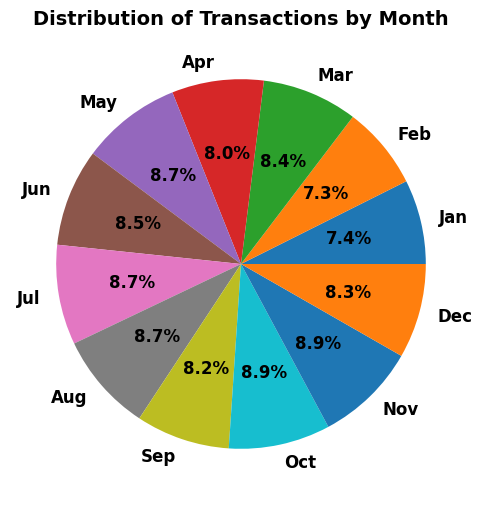

In [ ]:
# Group the data by latest month and count the number of occurrences
counts = data.groupby('latest_month')['NEW_MCID'].count()

# Sort the counts in ascending order
sorted_counts = counts.sort_index()

# Create a dictionary with the label properties
label_props = {'fontsize': 12, 'fontweight': 'bold'}

# Create a new figure with a larger size
plt.figure(figsize=(8, 6))

# Create the pie chart with the label properties
plt.pie(sorted_counts.values, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], autopct='%1.1f%%', textprops=label_props)

# Add title
plt.title('Distribution of Transactions by Month', fontweight='bold', fontsize= '14')

# Display the chart
plt.show()

In [ ]:
# Replace values that are not recognized as NaN with NaN
data[['RDT_MERCHANT_NAME', 'RDT_MERCHANT_CITY', 'RDT_MERCHANT_STATE']] = data[['RDT_MERCHANT_NAME', 'RDT_MERCHANT_CITY', 'RDT_MERCHANT_STATE']].replace(['NaN', 'None', 'NA', 'N/A'], np.NaN)

# Get the mode value
mode_value = data[['RDT_MERCHANT_NAME', 'RDT_MERCHANT_CITY', 'RDT_MERCHANT_STATE']].mode().iloc[0]

# Replace NaN values with mode value
data[['RDT_MERCHANT_NAME', 'RDT_MERCHANT_CITY', 'RDT_MERCHANT_STATE']] = data[['RDT_MERCHANT_NAME', 'RDT_MERCHANT_CITY', 'RDT_MERCHANT_STATE']].fillna(mode_value)

In [ ]:
import re

# Replace special characters, numerics, and URLs with "Online Transactions" in city column
data['RDT_MERCHANT_CITY'] = data['RDT_MERCHANT_CITY'].apply(lambda x: np.nan if pd.isna(x) else re.sub('[^a-zA-Z\s]+|(http|https|HTTP|HTTPS)\S*', 'Online Transactions', x) if isinstance(x, str) and re.match('^[a-zA-Z\s]+$', x) else 'Online Transactions')

# Replace special characters, numerics, and URLs with "Online Transactions" in state column
data['RDT_MERCHANT_STATE'] = data['RDT_MERCHANT_STATE'].apply(lambda x: np.nan if pd.isna(x) else re.sub('[^a-zA-Z\s]+|(http|https|HTTP|HTTPS)\S*', 'Online Transactions', x) if isinstance(x, str) and re.match('^[a-zA-Z\s]+$', x) else 'Online Transactions')

In [ ]:
# checking the replaced values
customer_id = 862 # replace with the desired customer ID
customer_info = data.loc[customer_id]
print(customer_info)

NEW_MCID                                       2
TRX_DATE                     2022-02-02 00:00:00
RDT_MRCH_SIC_CODE                           4722
RDT_TRANSACTION_AMOUNT                     152.9
RDT_TRANSACTION_CODE                         253
RDT_CHD_EXT_STATUS                        Normal
RDT_CHD_INT_STATUS                        Normal
RDT_MERCHANT_CITY            Online Transactions
RDT_MERCHANT_NAME         HOTELSCOM9170254268381
RDT_MERCHANT_STATE                            WA
BIN                                       484722
latest_month                                   2
Name: 862, dtype: object


In [ ]:
# Select rows where 'COLUMN_NAME' starts with 'http' to see if all are replaced correctly
mask = data['RDT_MERCHANT_CITY'].str.startswith('http')

# Display the corresponding 'CUSTOMER_ID' values
print(data.loc[mask, 'NEW_MCID'])

Series([], Name: NEW_MCID, dtype: int64)


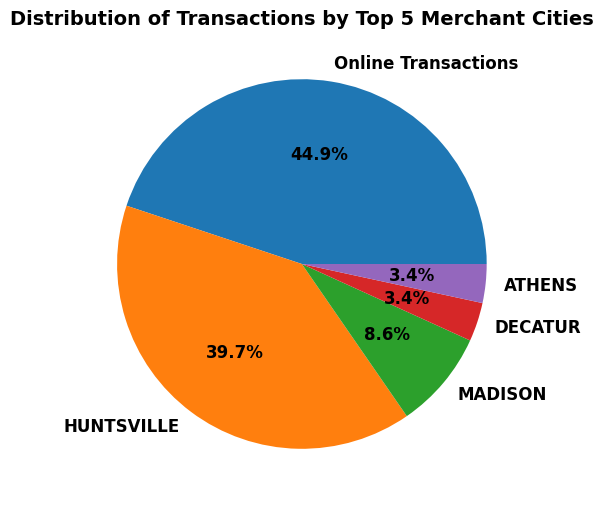

In [ ]:
# Group the data by merchant city and count the number of occurrences
counts = data.groupby('RDT_MERCHANT_CITY')['NEW_MCID'].count()

# Sort the counts in descending order and take only the top 5 values
top_counts = counts.sort_values(ascending=False)[:5]

# Create a dictionary with the label properties
label_props = {'fontsize': 12, 'fontweight': 'bold'}

# Create a new figure with a larger size
plt.figure(figsize=(8, 6))

# Create the pie chart with the label properties
plt.pie(top_counts.values, labels=top_counts.index, autopct='%1.1f%%', textprops=label_props)

# Add title
plt.title('Distribution of Transactions by Top 5 Merchant Cities', fontweight='bold', fontsize= '14')

# Display the chart
plt.show()

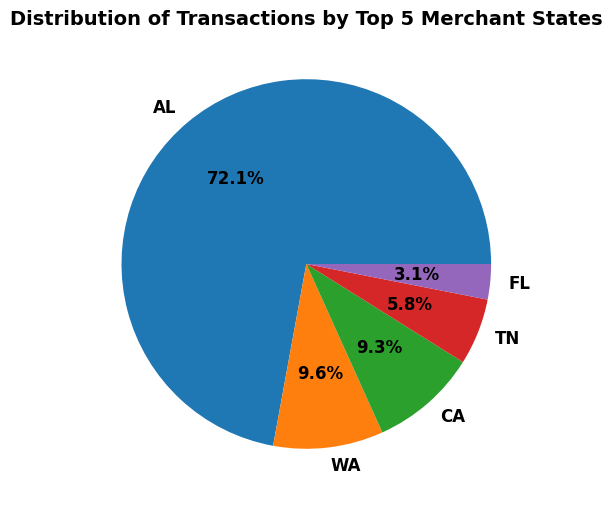

In [ ]:
# Group the data by merchant state and count the number of occurrences
counts = data.groupby('RDT_MERCHANT_STATE')['NEW_MCID'].count()

# Sort the counts in descending order and take only the top 5 values
top_counts = counts.sort_values(ascending=False)[:5]

# Create a dictionary with the label properties
label_props = {'fontsize': 12, 'fontweight': 'bold'}

# Create a new figure with a larger size
plt.figure(figsize=(8, 6))

# Create the pie chart with the label properties
plt.pie(top_counts.values, labels=top_counts.index, autopct='%1.1f%%', textprops=label_props)

# Add title
plt.title('Distribution of Transactions by Top 5 Merchant States', fontweight='bold', fontsize= '14')

# Display the chart
plt.show()

In [ ]:
# checking null values
data.isnull().sum()

NEW_MCID                  0
TRX_DATE                  0
RDT_MRCH_SIC_CODE         0
RDT_TRANSACTION_AMOUNT    0
RDT_TRANSACTION_CODE      0
RDT_CHD_EXT_STATUS        0
RDT_CHD_INT_STATUS        0
RDT_MERCHANT_CITY         0
RDT_MERCHANT_NAME         0
RDT_MERCHANT_STATE        0
BIN                       0
latest_month              0
dtype: int64

In [ ]:
# Create a new column named 'PURCHASE_TYPE' based on the value in the 'RDT_MERCHANT_CITY' column
data['PURCHASE_TYPE'] = np.where(data['RDT_MERCHANT_CITY'].isin(['Online Transactions', None, np.nan]), 'Online', 'In Store')

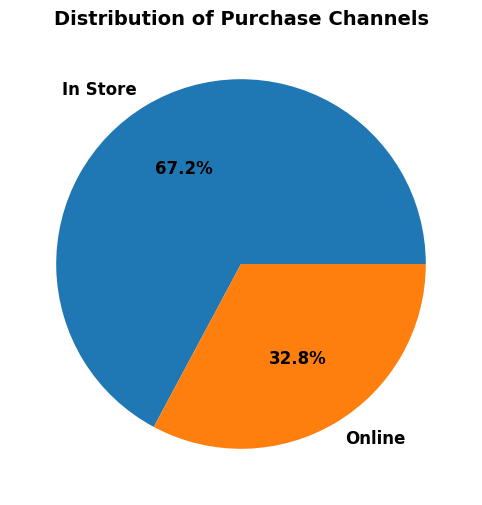

In [ ]:
# Group the data by purchase type and count the number of occurrences
counts = data.groupby('PURCHASE_TYPE')['NEW_MCID'].count()

# Create a dictionary with the label properties
label_props = {'fontsize': 12, 'fontweight': 'bold'}

# Create a new figure with a larger size
plt.figure(figsize=(8, 6))

# Create the pie chart with the label properties
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', textprops=label_props)

# Add title
plt.title('Distribution of Purchase Channels', fontweight='bold', fontsize= '14')

# Display the chart
plt.show()

In [ ]:
# getting the count of each channel
print(data['PURCHASE_TYPE'].value_counts())

In Store    10770621
Online       5262173
Name: PURCHASE_TYPE, dtype: int64


In [ ]:
# unique count of sic codes
data['RDT_MRCH_SIC_CODE'].nunique()

537

In [ ]:
# replacing sic codes with industry names
conditions = [data.RDT_MRCH_SIC_CODE.between(0,1499),

              data.RDT_MRCH_SIC_CODE.between(1500,2999),

              data.RDT_MRCH_SIC_CODE.between(3000,3299),

              data.RDT_MRCH_SIC_CODE.between(3300,3499),

              data.RDT_MRCH_SIC_CODE.between(3500,3999),

              data.RDT_MRCH_SIC_CODE.between(4000,4799),

              data.RDT_MRCH_SIC_CODE.between(4800,4999),

              data.RDT_MRCH_SIC_CODE.between(5000,5599),  

              data.RDT_MRCH_SIC_CODE.between(5600,5699),

              data.RDT_MRCH_SIC_CODE.between(5700,7299),

              data.RDT_MRCH_SIC_CODE.between(7300,7999),

              data.RDT_MRCH_SIC_CODE.between(8000,8999),

              data.RDT_MRCH_SIC_CODE.between(9000,9999)

             ]

choices = ['Agricultural Services', 'Contracted Services', 'Airlines', 'Car Rental', 'Lodging', 'Transportation Services', 'Utility Services', 'Retail Outlet Services', 'Clothing Stores', 'Miscellaneous Stores',

          'Business Services', 'Professional Services and Membership Organizations', 'Government Services']

data['INDUSTRY_TYPE'] = np.select(conditions, choices, default='Others')

data.loc[data.RDT_MRCH_SIC_CODE.isin([5814, 5812]), 'INDUSTRY_TYPE'] = 'Restaurant'

data.loc[data.RDT_MRCH_SIC_CODE.isin([5541, 5542]), 'INDUSTRY_TYPE'] = 'Gas'

data.loc[data.RDT_MRCH_SIC_CODE.isin([4899, 4814, 4900]), 'INDUSTRY_TYPE'] = 'Telecom/Utility'

data.loc[data.RDT_MRCH_SIC_CODE==5411, 'INDUSTRY_TYPE'] = 'Grocery'

data.loc[data.RDT_MRCH_SIC_CODE==5310, 'INDUSTRY_TYPE'] = 'Discount_Store'

data.loc[data.RDT_MRCH_SIC_CODE==5300, 'INDUSTRY_TYPE'] = 'Wholesale_Club'

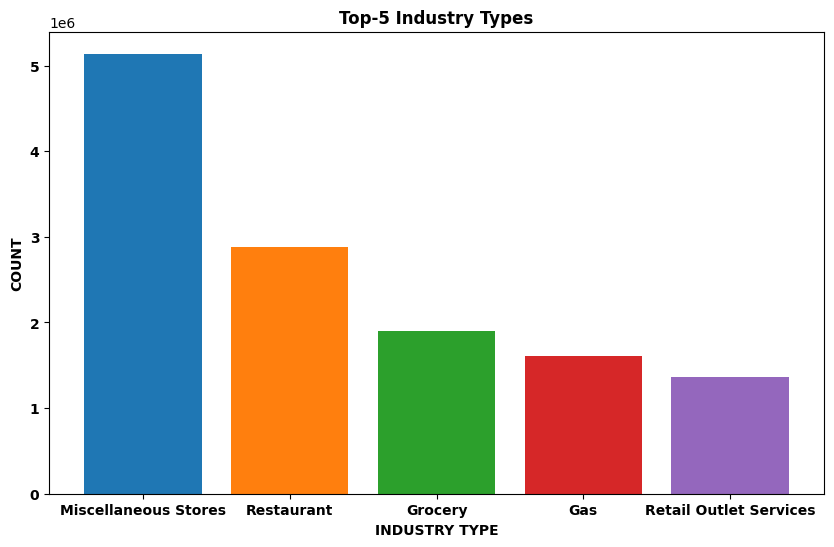

In [ ]:
# Group the data by industry type and count the number of occurrences
counts = data.groupby('INDUSTRY_TYPE')['NEW_MCID'].count()

# Sort the counts in descending order and take only the top 5 values
top_counts = counts.sort_values(ascending=False)[:5]

# Define a list of colors for the bars
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Create a new figure with a larger size
plt.figure(figsize=(10, 6))

# Create a bar chart with different colors for each bar
plt.bar(top_counts.index, top_counts.values, color=colors)

# Add title and labels with bold fontweight
plt.title('Top-5 Industry Types', fontweight='bold')
plt.xlabel('INDUSTRY TYPE', fontweight='bold')
plt.ylabel('COUNT', fontweight='bold')

# Set label properties for both axes
plt.tick_params(axis='both', which='major', labelsize=10)

# Set x-axis labels to be bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Display the chart
plt.show()


In [ ]:
# dropping the original sic codes column
data = data.drop(['RDT_MRCH_SIC_CODE'],axis=1)

In [ ]:
# made a copy of original dataset and ceating new relevant features
df = data.copy()
df['RDT_TRANSACTION_CODE'] = df['RDT_TRANSACTION_CODE'].astype(str)

# Group the data by 'NEW_MCID' and 'RDT_TRANSACTION_CODE', and reshape the data
df_grouped = df.groupby(['NEW_MCID', 'RDT_TRANSACTION_CODE']).agg({'RDT_TRANSACTION_AMOUNT': ['sum', 'min', 'max'],'TRX_DATE':['nunique']})
df_grouped.columns = ['_'.join(col) for col in df_grouped.columns]
#df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.reset_index().pivot_table(index='NEW_MCID', columns='RDT_TRANSACTION_CODE', values=['RDT_TRANSACTION_AMOUNT_sum', 'RDT_TRANSACTION_AMOUNT_min', 'RDT_TRANSACTION_AMOUNT_max','TRX_DATE_nunique'])
df_grouped.columns = ['_'.join(col) for col in df_grouped.columns]
df_grouped = df_grouped.reset_index()
df_grouped = df_grouped.fillna(0)
# Create amount_spent column
df_grouped['Amount_Spent'] = df_grouped['RDT_TRANSACTION_AMOUNT_sum_253'] - df_grouped['RDT_TRANSACTION_AMOUNT_sum_255']

# Create purchase_frequency column
df_grouped['Purchase_Frequency'] = df_grouped['TRX_DATE_nunique_253']

# Create minimum and maximum payment columns
df_grouped['Min_Payment_Amount'] = df_grouped['RDT_TRANSACTION_AMOUNT_min_271']
df_grouped['Max_Payment_Amount'] = df_grouped['RDT_TRANSACTION_AMOUNT_max_271']

# Create total payment and payment frequency columns
df_grouped['Total_Payment_Amount'] = df_grouped['RDT_TRANSACTION_AMOUNT_sum_271']
df_grouped['Payment_Frequency'] = df_grouped['TRX_DATE_nunique_271']
;;;;;;;;;;;;;;;;;;;;;;;;;;;
# Create minimum and maximum cash columns
df_grouped['Min_CashAdvance'] = df_grouped['RDT_TRANSACTION_AMOUNT_min_254']
df_grouped['Max_CashAdvance'] = df_grouped['RDT_TRANSACTION_AMOUNT_max_254']

# Create total cash and cash frequency columns
df_grouped['Total_CashAdvance'] = df_grouped['RDT_TRANSACTION_AMOUNT_sum_254']
df_grouped['CashAdvance_Frequency'] = df_grouped['TRX_DATE_nunique_254']
df_grouped['Return_Frequency'] = df_grouped['TRX_DATE_nunique_255']

# Create cashback rate column
#df_grouped['purchase_return_ratio '] = (df_grouped['RDT_TRANSACTION_AMOUNT_sum_255'] / df_grouped['RDT_TRANSACTION_AMOUNT_sum_253'])
#df_grouped['full_payment_percentage'] = (df_grouped['RDT_TRANSACTION_AMOUNT_sum_271']/df_grouped['TRX_DATE_nunique_271'])
# # Display the resulting DataFrame
#df_grouped.fillna(0)
df_grouped.head(10)

,NEW_MCID,RDT_TRANSACTION_AMOUNT_max_253,RDT_TRANSACTION_AMOUNT_max_254,RDT_TRANSACTION_AMOUNT_max_255,RDT_TRANSACTION_AMOUNT_max_271,RDT_TRANSACTION_AMOUNT_min_253,RDT_TRANSACTION_AMOUNT_min_254,RDT_TRANSACTION_AMOUNT_min_255,RDT_TRANSACTION_AMOUNT_min_271,RDT_TRANSACTION_AMOUNT_sum_253,...,Purchase_Frequency,Min_Payment_Amount,Max_Payment_Amount,Total_Payment_Amount,Payment_Frequency,Min_CashAdvance,Max_CashAdvance,Total_CashAdvance,CashAdvance_Frequency,Return_Frequency
0,1,2251.94,0.0,75.43,4155.63,1.06,0.0,8.61,794.62,30425.55,...,310.0,794.62,4155.63,29614.16,16.0,0.0,0.0,0.00,0.0,4.0
1,2,2177.44,4400.0,646.74,4000.00,0.75,4400.0,84.53,200.00,17223.48,...,99.0,200.00,4000.00,20668.40,14.0,4400.0,4400.0,4400.00,1.0,4.0
2,3,714.51,0.0,0.00,450.00,9.99,0.0,0.00,200.00,4397.69,...,50.0,200.00,450.00,6171.00,14.0,0.0,0.0,0.00,0.0,0.0
3,4,1335.85,0.0,300.00,2220.65,0.33,0.0,0.08,15.00,29033.79,...,244.0,15.00,2220.65,28979.14,74.0,0.0,0.0,0.00,0.0,24.0
4,5,1678.50,0.0,464.81,11159.02,0.49,0.0,1.00,82.00,60458.04,...,299.0,82.00,11159.02,63188.49,12.0,0.0,0.0,0.00,0.0,26.0
5,6,40.00,0.0,0.00,290.87,10.00,0.0,0.00,25.00,230.00,...,10.0,25.00,290.87,480.87,6.0,0.0,0.0,0.00,0.0,0.0
6,7,8704.31,0.0,103.53,8000.00,0.94,0.0,13.78,400.00,41727.30,...,150.0,400.00,8000.00,43105.00,28.0,0.0,0.0,0.00,0.0,6.0
7,8,2800.00,0.0,1437.20,13074.99,0.01,0.0,4.50,1510.70,109164.62,...,339.0,1510.70,13074.99,105829.58,13.0,0.0,0.0,0.00,0.0,30.0
8,9,268.00,0.0,0.00,1000.00,0.75,0.0,0.00,74.08,7154.85,...,109.0,74.08,1000.00,8559.61,12.0,0.0,0.0,0.00,0.0,0.0
9,10,156.13,106.0,0.00,200.00,5.01,100.0,0.00,30.00,698.29,...,13.0,30.00,200.00,860.00,13.0,100.0,106.0,417.96,4.0,0.0


In [ ]:
# aggregating the data using unique customer id

def find_mode(x):
    return stats.mode(x).mode[0]

def calc_percent_online(x):
    return (x[x == 'Online'].count() / x.count()) * 100

agg_df = data.groupby('NEW_MCID').agg({
    #'RDT_TRANSACTION_AMOUNT': ['sum'],
    #'TRX_DATE': ['nunique'],
    'RDT_CHD_EXT_STATUS': find_mode,
    'RDT_CHD_INT_STATUS': find_mode,
    'RDT_MERCHANT_CITY': find_mode,
    'RDT_MERCHANT_STATE': find_mode,
    'PURCHASE_TYPE': calc_percent_online,
    'INDUSTRY_TYPE': find_mode,
    'latest_month': find_mode
})

agg_df.reset_index(inplace=True)

agg_df.columns = ['NEW_MCID', 'Account_External_Status', 'Account_Internal_Status', 'Merchant_City', 'Merchant_State', 'Percent_Online', 'Industry_Type', 'Frequent_Month']

<ipython-input-21-4a564ac28832>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return stats.mode(x).mode[0]
<ipython-input-21-4a564ac28832>:4: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  return stats.mode(x).mode[0]


In [ ]:
# displaying top 5 rows of the aggregated dataframe
agg_df.head(5)

,NEW_MCID,Account_External_Status,Account_Internal_Status,Merchant_City,Merchant_State,Percent_Online,Industry_Type,Frequent_Month
0,1,Normal,Normal,SAN DIEGO,CA,31.524548,Restaurant,10
1,2,Normal,Normal,unknown,AL,49.056604,Miscellaneous Stores,8
2,3,Normal,Normal,unknown,AL,55.696203,Miscellaneous Stores,7
3,4,Normal,Normal,unknown,AL,48.684211,Miscellaneous Stores,5
4,5,Normal,Normal,unknown,CA,31.607930,Miscellaneous Stores,6


In [ ]:
# creating final dataframe with the original and new features 
Final_df = agg_df.merge(df_grouped,on='NEW_MCID',how='inner')
Final_df = Final_df.loc[:, ['NEW_MCID', 'Account_External_Status', 'Account_Internal_Status', 'Merchant_City', 'Merchant_State', 'Percent_Online', 'Industry_Type', 'Frequent_Month', 'Amount_Spent', 'Purchase_Frequency', 'Min_Payment_Amount', 'Max_Payment_Amount', 'Total_Payment_Amount', 'Payment_Frequency', 'Min_CashAdvance', 'Max_CashAdvance', 'Total_CashAdvance', 'CashAdvance_Frequency', 'Return_Frequency']]

In [ ]:
# creating a copy of final aggregated dataframe
data_new = Final_df.copy()

**FREQUENCY ENCODING**

In [ ]:
# applying frequency encoding to Merchant State and Merchant City columns
freq_merchant_state = data_new['Merchant_State'].value_counts(normalize=True)
freq_dict1 = freq_merchant_state.to_dict()

freq_merchant_city = data_new['Merchant_City'].value_counts(normalize=True) # calculate frequency of each category
freq_dict2 = freq_merchant_city.to_dict()

In [ ]:
total_obs = len(data_new)
data_new['Merchant_State'] = data_new['Merchant_State'].map(freq_dict1) * total_obs
data_new['Merchant_City'] = data_new['Merchant_City'].map(freq_dict2) * total_obs

# For columns with many unique values like city and state, frequency encoding is generally preferred over label encoding.
# This is because label encoding can create an arbitrary order of labels, which can be problematic for non-ordinal categorical data.
# Frequency encoding, on the other hand, encodes the frequency of each category, which preserves the information about each category without introducing arbitrary ordering. 
# Additionally, frequency encoding can be beneficial in cases where the frequency of a category may be informative for the clustering process.

**ONE-HOT ENCODING**

In [ ]:
# applying one-hot encoding to Industry Type column

# list of column names to one-hot encode
columns_to_encode = ['Industry_Type']

# apply one-hot encoding
one_hot_encoded = pd.get_dummies(data_new[columns_to_encode])

# drop the original categorical columns from the original data frame
data_new = data_new.drop(columns_to_encode, axis=1)

# concatenate the original and one-hot encoded dataframes
data_new = pd.concat([data_new, one_hot_encoded], axis=1)

**DROPPING COLUMNS**

In [ ]:
# dropping few columns which are not helping in improving the ML algorithm performance
data_new = data_new.drop(['Account_External_Status', 'Account_Internal_Status','NEW_MCID'], axis=1)

In [ ]:
# displaying the top 10 rows of dataframe
data_new.head()

In [ ]:
# displaying the column names
data_new.columns

**CORRELATION MATRIX: FEATURE SELECTION**

In [ ]:
# Compute correlation matrix
corr_matrix = data_new.corr().abs()

# Create heatmap for correlation matrix
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', center=0, ax=ax)
ax.set_title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation matrix of the features
corr_matrix = data_new.corr().abs()

# Create a mask for highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Identify highly correlated features
highly_correlated = corr_matrix.mask(mask).stack().sort_values(ascending=False)

# Set a threshold for correlation coefficient
threshold = 0.8

# Select features with correlations below the threshold
selected_features = []
for col in corr_matrix:
    if all(corr_matrix.loc[col, other] < threshold for other in selected_features):
        selected_features.append(col)
        print(f"Added column '{col}' to the selected features.")
    else:
        correlated_features = [other for other in selected_features if corr_matrix.loc[col, other] >= threshold]
        print(f"Dropped column '{col}' due to high correlation with {', '.join(correlated_features)}.")

# Display highly correlated features
print(f"The highly correlated features are:\n{highly_correlated[highly_correlated > threshold]}\n")

# Display selected features
print(f"The selected features are: {selected_features}")


# This code selects only one feature from a pair of highly correlated features by comparing each feature's correlation with all other previously selected features. It starts with an empty list of selected features and iterates over each feature in the correlation matrix. For each feature, it checks if its correlation with all other previously selected features is below the threshold. If so, it adds the feature to the list of selected features.

In [ ]:
# Create a new DataFrame with only the selected features
selected_data = data_new[selected_features]

**DATA SCALING**

In [ ]:
# Storing MinMaxScaler function in a new variable
scaler = MinMaxScaler()

In [ ]:
# Fit scaler
scaler.fit(selected_data.values)

In [ ]:
# transform data
data_scaled = scaler.transform(selected_data.values)

**K-MEANS ALGORITHM IMPLEMENTATION**

In [ ]:
# range of number of clusters to try
k_range = range(3, 11)

# empty lists to store the silhouette scores for each number of clusters
silhouette_scores = []

# loop through the range of number of clusters and fit the k-means model
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    
    # calculate the silhouette score for the current k
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

    # Print the silhouette scores for each value of k
    print(f"k={k}, Silhouette score={silhouette_scores[-1]}")
          
# plot the silhouette scores against the number of clusters
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
kmean = KMeans(n_clusters=5, n_init=10)
kmean.fit(data_scaled)
km_labels=kmean.labels_

**K-MEANS: EVALUATION METRICS**

In [ ]:
silhouette = silhouette_score(data_scaled, km_labels)
print("KMeans Silhouette score:", silhouette)
davies_bouldin = davies_bouldin_score(data_scaled, km_labels)
print("KMeans Davies-Bouldin Index:", davies_bouldin)
calinski_harabasz = calinski_harabasz_score(data_scaled, km_labels)
print("KMeans Calinski-Harabasz Index:", calinski_harabasz)

In [ ]:
km_clusters=pd.concat([data, pd.DataFrame({'km_cluster':km_labels})], axis=1)
km_clusters.head()

**MEANSHIFT ALGORITHM IMPLEMENTATION**

In [ ]:
# Estimate the bandwidth of the data using the estimate_bandwidth function, with quantile=0.69 and n_samples=500. This calculates a bandwidth value that is used in the MeanShift algorithm.
bandwidth = estimate_bandwidth(data_scaled, quantile=0.650, n_samples=900)   

# Create an instance of the MeanShift algorithm with the estimated bandwidth and bin_seeding=True. This creates the clustering model that will be fit to the data.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)     

# Fit the MeanShift model to the scaled data.
ms.fit(data_scaled)                    

# Retrieve the labels assigned to each data point by the clustering model.
ms_labels = ms.labels_                 

# Retrieve the cluster centers found by the clustering model.
cluster_centers = ms.cluster_centers_  

# Calculate the number of clusters found by the clustering model, by counting the number of unique labels.
n_clusters_ = len(np.unique(ms_labels))  

# Print the estimated number of clusters found by the MeanShift algorithm.
print("Estimated clusters:", n_clusters_)   

**MEANSHIFT: EVALUATION METRICS**

In [ ]:
silhouette = silhouette_score(data_scaled, ms_labels)
print("Mean Shift Silhouette score:", silhouette)
davies_bouldin = davies_bouldin_score(data_scaled, ms_labels)
print("Mean Shift Davies-Bouldin Index:", davies_bouldin)
calinski_harabasz = calinski_harabasz_score(data_scaled, ms_labels)
print("Mean Shift Calinski-Harabasz Index:", calinski_harabasz)

In [ ]:
ms_clusters=pd.concat([data, pd.DataFrame({'ms_cluster':ms_labels})], axis=1)
ms_clusters.head()

**GAUSSIAN MIXTURE ALGORITHM IMPLEMENTATION**

In [ ]:
# range of number of clusters to try
k_range = range(3, 11)

# empty list to store the silhouette score for each number of clusters
silhouette_scores = []

# loop through the range of number of clusters and fit the Gaussian mixture model
for k in k_range:
    gaussian = GaussianMixture(n_components=k, n_init=10)
    gaussian.fit(data_scaled)
    
    # predict cluster labels for each data point
    gmm_labels = gaussian.predict(data_scaled)
    
    # calculate the silhouette score for the current k and append it to the list
    score = silhouette_score(data_scaled, gmm_labels)
    silhouette_scores.append(score)

    # Print the silhouette score for each value of k
    print(f"k={k}, Silhouette score={score}")

# plot the silhouette score against the number of clusters
import matplotlib.pyplot as plt
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xticks(k_range)
plt.show()

In [ ]:
gaussian = GaussianMixture(n_components=5, n_init=10)
gaussian.fit(data_scaled)
gmm_labels = gaussian.predict(data_scaled)

**GAUSSIAN MIXTURE: EVALUATION METRICS**

In [ ]:
silhouette = silhouette_score(data_scaled, gmm_labels)
print("GaussianMixture Silhouette score:", silhouette)
davies_bouldin = davies_bouldin_score(data_scaled, gmm_labels)
print("GaussianMixture Davies-Bouldin Index:", davies_bouldin)
calinski_harabasz = calinski_harabasz_score(data_scaled, gmm_labels)
print("GaussianMixture Calinski-Harabasz Index:", calinski_harabasz)

In [ ]:
gmm_clusters=pd.concat([data, pd.DataFrame({'gmm_cluster':gmm_labels})], axis=1)
gmm_clusters.head()

**BIRCH ALGORITHM IMPLEMENTATION**

In [ ]:
# range of number of clusters to try
k_range = range(3, 11)

# empty list to store the average silhouette scores for each number of clusters
silhouette_scores = []

# loop through the range of number of clusters and fit the Birch model
for k in k_range:
    birch = Birch(n_clusters=k)
    birch.fit(data_scaled)

    # calculate the silhouette score for the current k and append it to the list
    score = silhouette_score(data_scaled, birch.labels_)
    silhouette_scores.append(score)

    # Print the silhouette score for each value of k
    print(f"k={k}, Silhouette score={score}")

# plot the silhouette scores against the number of clusters
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Birch Clustering')
plt.xticks(k_range)
plt.show()

In [ ]:
birch = Birch(n_clusters=10)
birch.fit(data_scaled)
br_labels = birch.predict(data_scaled)

**BIRCH: EVALUATION METRICS**

In [ ]:
silhouette = silhouette_score(data_scaled, br_labels)
print("Birch Silhouette score:", silhouette)
davies_bouldin = davies_bouldin_score(data_scaled, br_labels)
print("Birch Davies-Bouldin Index:", davies_bouldin)
calinski_harabasz = calinski_harabasz_score(data_scaled, br_labels)
print("Birch Calinski-Harabasz Index:", calinski_harabasz)

In [ ]:
br_clusters=pd.concat([data, pd.DataFrame({'br_cluster':br_labels})], axis=1)
br_clusters.head()

Based on the metrics, the Calinski-Harabasz Index, which measures how well-separated the clusters are, is highest for the KMeans method. It has a low Davies-Bouldin Index, which measures the average similarity between each cluster and its closest comparable cluster, and a relatively high Silhouette score, which measures how similar an object is to its own cluster in relation to other clusters. This shows that KMeans might be a good choice for clustering our data.

**K-MEANS: VISUALIZATION**

In [ ]:
# displaying facetgrid plot for the below listed features

columns_to_plot = ['Percent_Online', 'Frequent_Month', 'Amount_Spent', 'Purchase_Frequency', 'Min_Payment_Amount', 'Max_Payment_Amount', 'Total_Payment_Amount', 'Payment_Frequency', 'Min_CashAdvance', 'Max_CashAdvance', 'Total_CashAdvance', 'CashAdvance_Frequency', 'Return_Frequency']

for c in columns_to_plot:
    grid = sns.FacetGrid(data=km_clusters, col='km_cluster', col_wrap=3)
    grid.map(sns.histplot, c)
    grid.set_axis_labels(c, 'Count')
    plt.subplots_adjust(top=0.9)
    grid.fig.suptitle(c)

In [ ]:
# Bar plots: Define the columns to plot
columns_to_plot = ['Merchant_City', 'Merchant_State', 'Industry_Type']

# Loop through each cluster and plot the top 5 cities, states, and industry types
for c in km_clusters['km_cluster'].unique():
    fig, axs = plt.subplots(ncols=3, figsize=(20,5))
    for i, col in enumerate(columns_to_plot):
        top_values = br_clusters[km_clusters['km_cluster'] == c][col].value_counts().head(5)
        sns.barplot(x=top_values.index, y=top_values, ax=axs[i], palette='rocket')
        axs[i].set_title(f"Top 5 {col} in Cluster {c}")
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

**K-MEANS: CLUSTER SUMMARY STATISTICS**


In [ ]:
# select only 'few' columns
cols = ['Percent_Online', 'Frequent_Month', 'Amount_Spent', 'Purchase_Frequency']
few_data = km_clusters[cols + ['km_cluster']]

# group data by cluster and compute summary statistics
cluster_summary = few_data.groupby('km_cluster').agg(['mean', 'median', 'std','sum']).round(2)

# display summary statistics in table format
display(cluster_summary)

In [ ]:
# select only 'few' columns
cols = ['Total_Payment_Amount', 'Payment_Frequency','Total_CashAdvance']
few_data = km_clusters[cols + ['km_cluster']]

# group data by cluster and compute summary statistics
cluster_summary = few_data.groupby('km_cluster').agg(['mean', 'median', 'std','sum','count']).round(2)

# display summary statistics in table format
display(cluster_summary)

In [ ]:
# select only 'few' columns
cols = ['CashAdvance_Frequency', 'Return_Frequency']
few_data = km_clusters[cols + ['km_cluster']]

# group data by cluster and compute summary statistics
cluster_summary = few_data.groupby('km_cluster').agg(['mean', 'median', 'std','sum','count']).round(2)

# display summary statistics in table format
display(cluster_summary)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for each cluster
cluster0 = [2, 1, 2] # Medium online; low frequency; medium value
cluster1 = [1, 3, 3] # Low online; high frequency; high value
cluster2 = [2, 3, 3] # Medium online; high frequency; high value
cluster3 = [1, 2, 1] # Low online; medium frequency; low value
cluster4 = [3, 2, 2] # High online; medium frequency; medium value

# Define the mapping of numerical values to labels
labels_mapping = {
    1: 'Low',
    2: 'Medium',
    3: 'High'
}

# Set the positions of the bars on the x-axis
x = np.arange(5)

# Define the width of the bars
width = 0.1

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10,6))

# Plot each category as a set of bars for each cluster
ax.bar(x - 2.5*width, [cluster0[0], cluster1[0], cluster2[0], cluster3[0], cluster4[0]], width, label='Channel: % of Online Trans')
ax.bar(x - 1.5*width, [cluster0[1], cluster1[1], cluster2[1], cluster3[1], cluster4[1]], width, label='Purchase Frequency')
ax.bar(x - 0.5*width, [cluster0[2], cluster1[2], cluster2[2], cluster3[2], cluster4[2]], width, label='Monetary Value')

# Set the title and axis labels
ax.set_title('Comparison of Purchasing Behaviors Across Customer Clusters', fontweight='bold')
ax.set_xlabel('Clusters', fontweight='bold')
ax.set_ylabel('Range', fontweight='bold')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], fontweight='bold')

# Set the y-axis ticks and labels
y_ticks = np.unique(np.array([cluster0, cluster1, cluster2, cluster3, cluster4]))
y_tick_labels = [labels_mapping[y] for y in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontweight='bold')

# Add a legend
ax.legend(loc='upper left', fontsize='small')

# Show the plot
plt.show()